In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\ngocd\source\Github\DataAnalysisProjects\HigherEducation\IAUData.csv', encoding='latin-1')

In [41]:
## Clean data
data = data.dropna()
data.columns = data.columns.str.strip()

In [68]:
## Create a data frame
df = pd.DataFrame(data)

## Map institutional type to labels
df['Type'] = df['Type'].map({1: 'Public', 2: 'Private'})

## Melt the DataFrame for long format
df_melted = df.melt(id_vars=['Type'],var_name='ChangeFactor',value_name='Score')

# Convert the Score column to integers
df_melted['Score'] = pd.to_numeric(df_melted['Score'], errors='coerce')

# Filter for scores of interest (e.g., scores of 4 and above)
df_filtered = df_melted[df_melted['Score'] >= 4]

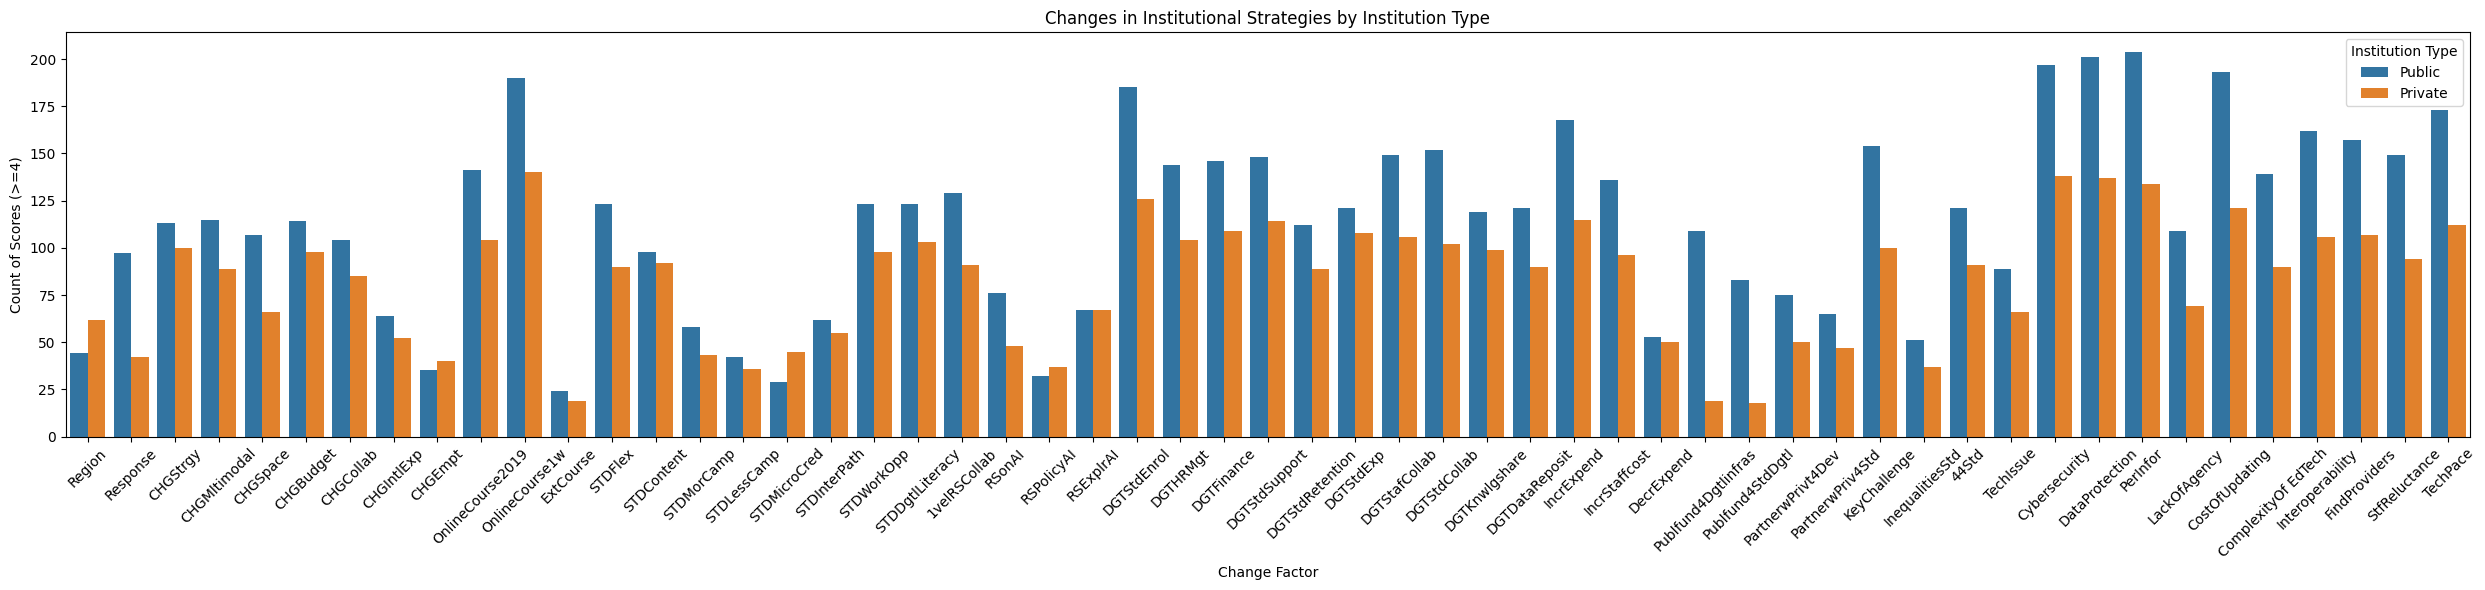

In [71]:
# Plot the data
plt.figure(figsize=(25,6))
sns.countplot(data=df_filtered, x='ChangeFactor', hue='Type')
plt.title('Changes in Institutional Strategies by Institution Type')
plt.xlabel('Change Factor')
plt.ylabel('Count of Scores (>=4)')
plt.legend(title='Institution Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('institutional_changes.png')

# Show the plot
plt.show()